In [19]:
#import all of the libraries we are going to need
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from scipy import stats

In [25]:
#import the data we are going to need and fill the empty values with 0
df = pd.read_csv('convextutorial.csv')
df = df.fillna(0)

#convert the x and y values to the size of the pitch we will use (120,80)
df['y'] = .8*df['y']
df['x'] = 1.2*df['x']

#filter for the team we want and reset the index so that we can use for loops over it
df = df[df['teamId']==65].reset_index()

#the player ids are technically floats so we want to change those to ints
df['playerId'] = df['playerId'].astype(int) 

#Get a list of the unique player ids if you just want the starters, get a list of the first 11.
#it is 11 because it goes down the column so the first 11 will be the starters 
#unless someone is subbed off in like the first 5 minutes
players = df['playerId'].unique()
starters = players[0:11]
#you can sort them if you want
starters.sort()


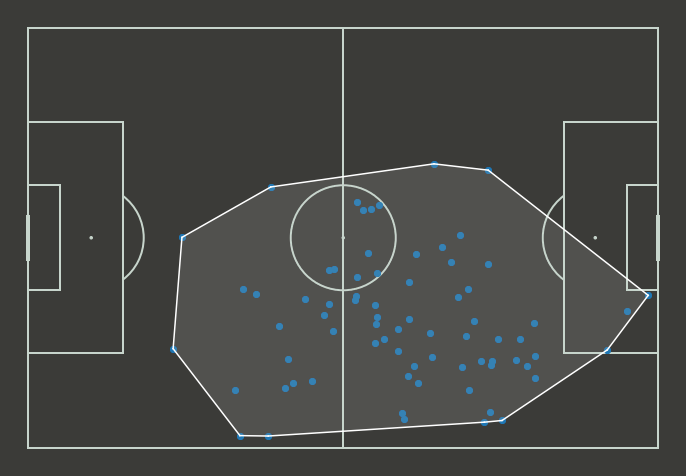

In [28]:
#A single player

#set up the pitch
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#3b3b38')
ax.patch.set_facecolor('#3b3b38')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#3b3b38', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#Create a new data frame for the player and filter for only passes
df1 = df[df["playerId"]==21]
df1 = df1[df1['type/value']==1]

#filter that dataframe to exclude outliers. Anything over a z score of 2 will be excluded for the data points
df1 = df1[(np.abs(stats.zscore(df1[['x','y']])) < 3)]

#Create an array of the x/y coordinate groups
points = df1[['x', 'y']].values

#Create the convex hull
hull = ConvexHull(df1[['x','y']])

#plot the pass locations
plt.scatter(df1.x,df1.y)

#Loop through each of the hull's simplices
for i in hull.simplices:
    #Draw a black line between each
    plt.plot(points[i, 0], points[i, 1], 'white')
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], c='white', alpha=0.01)


/Users/mckayjohns/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2497: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
/Users/mckayjohns/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mckayjohns/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mckayjohns/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/mckayjohns/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:206: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


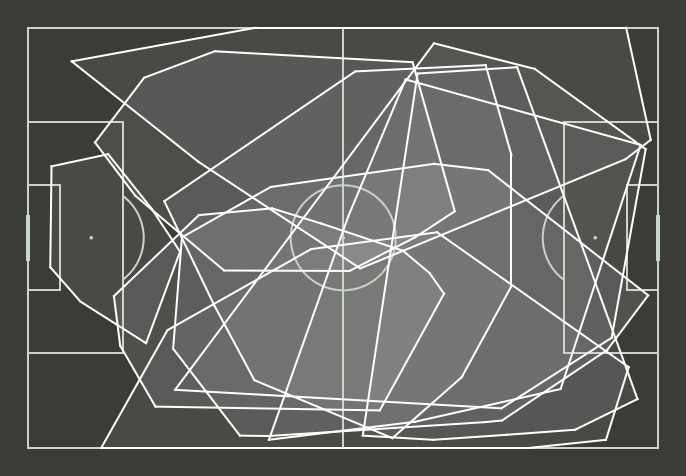

In [24]:
#A whole team, just the starters
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#3b3b38')
ax.patch.set_facecolor('#3b3b38')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#3b3b38', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()


for player in starters:
    
    #Create a new dataframe for the player
    df2 = df[df["playerId"]==player]
    df2 = df2[df2['type/value']==1]
    
    #filter that dataframe to exclude outliers. Anything over a z score of 2 will be excluded for the data points
    df2 = df2[(np.abs(stats.zscore(df2[['x','y']])) < 2)]

    #Create an array of the x/y coordinate groups
    points = df2[['x', 'y']].values

    #If there are enough points for a hull, create it. If there's an error, pass
    try:
        hull = ConvexHull(df2[['x','y']])
        
    except:
        pass
    
    #If we created the hull, draw the lines and fill . If there's an error, pass
    try:
        
        for i in hull.simplices:
            plt.plot(points[i, 0], points[i, 1], c='white',lw=2)
            plt.fill(points[hull.vertices,0], points[hull.vertices,1], c='white', alpha=0.01)
      
                          
    except:
        pass